<a href="https://colab.research.google.com/github/valid999/Image_classification_deepLearning_PyTorch/blob/main/Image__Classification_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imaged classification project using the CIFR-10 DataSet

* Load and normalize the CIFAR10 and test dataset using torchvision
* Define a convolutional Neurtal Network
* Define the loss function
* Train the network on the training data
* Test the network on the test data
* the image size is 3 * 32 * 32  color width height
* The number of the dataset is 12500 images

#### Load the data  & libraries

In [73]:
import torch
import torchvision
import torchvision.transforms as transforms

#### Using the CIFR10 DATASET

In [74]:
# transforms = torch.nn.Sequential(
#      transforms.CenterCrop(10),
#   transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
#  )

In [75]:
transform = transforms.Compose(

    [transforms.ToTensor(),
     transforms.Normalize((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5))]


)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data' , train = True ,
                                        download = True , transform = transform)
print(len(trainset))

trainloader = torch.utils.data.DataLoader(trainset , batch_size = batch_size , shuffle = True , num_workers = 2 )
# It provides a way to iterate over the data in batches, which is more efficient than loading the entire dataset into memory

print((trainloader))

testset = torchvision.datasets.CIFAR10(root = './data' , train = False ,
                                       download = True , transform = transform)

testloader = torch.utils.data.DataLoader(testset , batch_size = batch_size , shuffle = False , num_workers = 2)

classes = ('plane' , 'car' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck')



Files already downloaded and verified
50000
Files already downloaded and verified


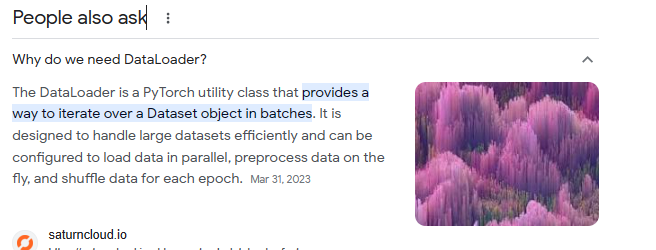

#### Plot the image

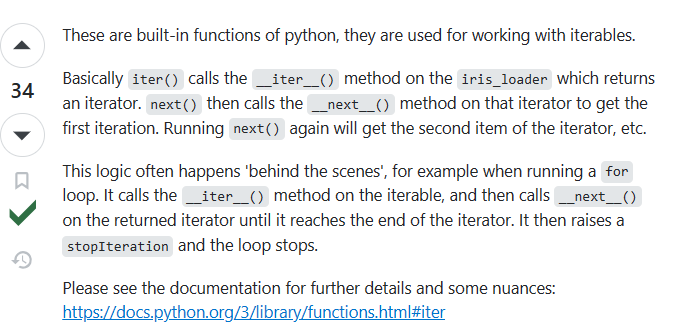

4


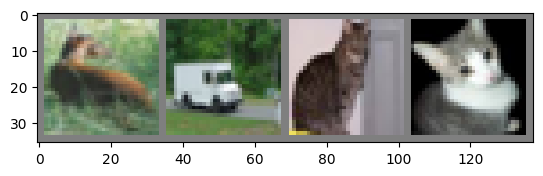

deer      truck     cat       cat      


In [76]:
#### show the images in the matplotlib.pyplot

import matplotlib.pyplot as plt
import numpy as np

# Functions to show the images


def imshow(img):
  img = img / 2 + 0.5   # make unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg , (1 , 2 , 0)) , cmap = 'gray')   # (1 , 2 , 0) for the transpose in the visulization
  plt.show()


# get some random training images
dataiter  = iter(trainloader)
images , labels = next(dataiter)  # next using to get the item line by lines
print(len(labels))
# print(len(dataiter))


# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:9s}' for j in range(batch_size)))
plt.show()

#### Define a Convolutional Neural Network

In [77]:
import torch.nn as nn
import torch.nn.functional as F



class Net(nn.Module): # nn.Module  are using  to build the neural network in the top of the torch
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3 , 6 , 5) # Feature extractions
    self.pool = nn.MaxPool2d(2 , 2) # Avoid overfitting
    self.conv2  = nn.Conv2d(6 , 16 , 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # input feature , output feature
    self.fc2 = nn.Linear(120 , 84)
    self.fc3 = nn.Linear(84  , 10)



  def forward(self , x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x , 1)  # Flatten all dimensions expet batch
# Batch size refers to the number of samples that the model processes at once before updating the weights.
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()






### Define the loss function and optimizer

In [78]:
# Use classification cross-entropy loss and SGD momentum .

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters() , lr = 0.006 , momentum = 0.9)

#### Train the network

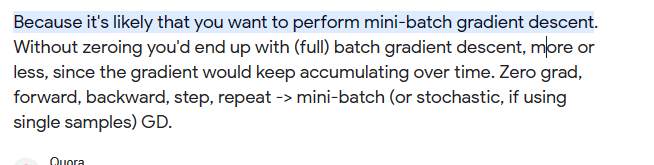

In [79]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i , data in enumerate(trainloader , 0):  # enumerate return the( index )and the  (value)
    # get the inputs ; data is a list of [input , labels]
    inputs , label = data

    # Zero the parameter gradients
    optimizer.zero_grad() # set the gradients every iter to one


    # forwar + backward + optimize

    outputs = net(inputs)
    loss = criterion(outputs , labels)
    loss.backward() # Compute the gradient  to tune the weights and the bias
    optimizer.step()


    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini batches
      print(f'[{epoch + 1} , {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1 ,  2000] loss: 1.065
[1 ,  4000] loss: 1.042
[1 ,  6000] loss: 1.041
[1 ,  8000] loss: 1.041
[1 , 10000] loss: 1.041
[1 , 12000] loss: 1.041
[2 ,  2000] loss: 1.040
[2 ,  4000] loss: 1.040
[2 ,  6000] loss: 1.041
[2 ,  8000] loss: 1.040
[2 , 10000] loss: 1.040
[2 , 12000] loss: 1.040
Finished Training


In [80]:
#### Save the model

torch.save(net.state_dict() , 'tensor_model.pt')


### Test the network on the test data



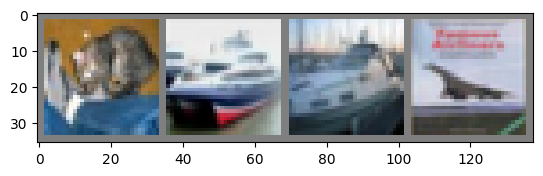

GroundTruth: cat   ship  ship  plane


In [81]:
dataiter = iter(testloader)
images , labels = next(dataiter)


# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:' , ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [82]:
# Load the model

torch.load('tensor_model.pt')

OrderedDict([('conv1.weight',
              tensor([[[[ 6.6419e-02,  8.0951e-02, -1.6050e-02, -3.4944e-02,  7.6552e-02],
                        [ 2.0321e-03,  1.1797e-02,  6.8186e-02,  1.0282e-01,  8.4213e-02],
                        [-1.3231e-02, -7.0981e-02,  1.0360e-01,  4.0471e-02,  1.8847e-02],
                        [ 5.2690e-02,  3.1827e-02,  7.3948e-02, -2.6129e-02, -7.2919e-02],
                        [ 6.4974e-02,  6.9503e-02,  3.8764e-03,  3.2142e-02,  4.7935e-02]],
              
                       [[-1.1854e-02, -1.6093e-02, -4.6302e-02, -4.9247e-02, -7.3196e-02],
                        [ 7.7769e-02, -8.5643e-02,  1.0064e-01, -4.2476e-02,  8.6249e-02],
                        [ 2.5283e-02,  5.0383e-02,  1.3629e-01,  6.9698e-02, -7.9096e-02],
                        [ 5.4490e-02,  4.3648e-02,  6.7854e-02,  2.9706e-02, -5.1472e-02],
                        [ 3.7567e-02,  5.6018e-02, -1.3957e-02, -8.2798e-02, -2.5299e-02]],
              
                       [[ 3.

In [83]:
outputs = net(images)

In [84]:
_ , predicted = torch.max(outputs , 1)
# _ meaning probabilites
# predicted return the index

print('Predicted: ' , ' '.join(f'{classes[predicted[j]]:10s}' for j in range(4)))


Predicted:  cat        cat        cat        cat       


In [85]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


In [86]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 100.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


#### Training on the GPU
* if you have the GPU

In [89]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
